In [3]:
import numpy as np
import pandas as pd
import scipy
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading the dataset in a pandas dataframe
dataframe=pd.read_csv('creditcard.csv')

In [5]:
#exploring the dataframe
print(dataframe.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
print("Shape of dataframe: ",dataframe.shape)

Shape of dataframe:  (284807, 31)


In [7]:
print(dataframe.describe())

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e

In [8]:
sample_data=dataframe.sample(frac=0.1,random_state=1)

In [9]:
print("Shape of sample: ",sample_data.shape)

Shape of sample:  (28481, 31)


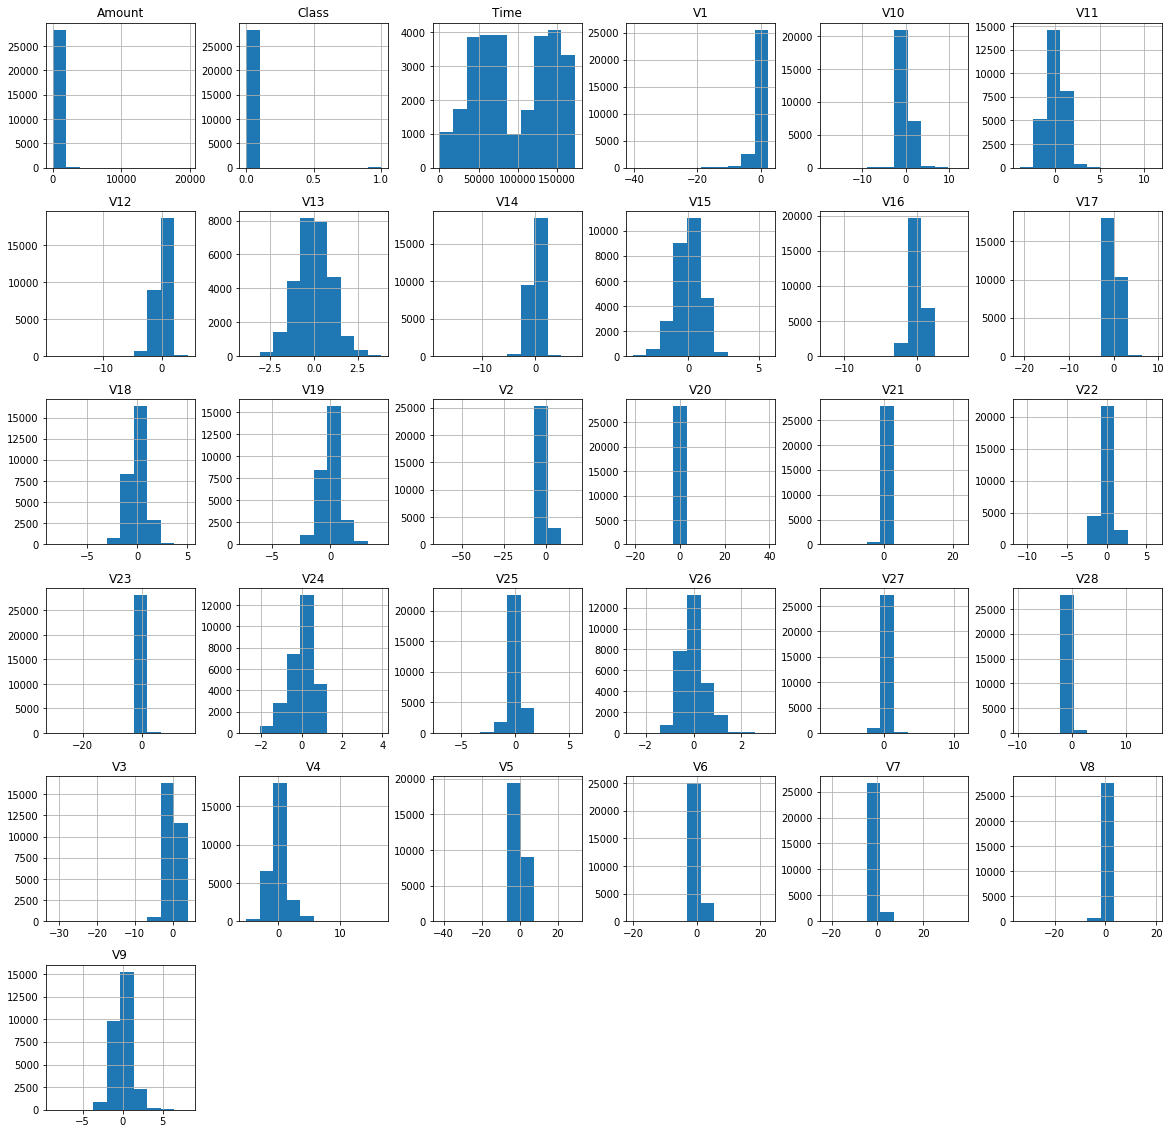

In [10]:
sample_data.hist(figsize=(20,20))
plt.show()

In [11]:
#Exploring fraud and real cases

fraud = sample_data[sample_data['Class']==1]
real  = sample_data[sample_data['Class']==0]

outlier_fraction=float(len(fraud)/len(real))

print("Outlier Fraction: ",outlier_fraction)
print("Number of real cases: ",len(real))
print("Number of fraud cases: ",len(fraud))


Outlier Fraction:  0.0017234102419808666
Number of real cases:  28432
Number of fraud cases:  49


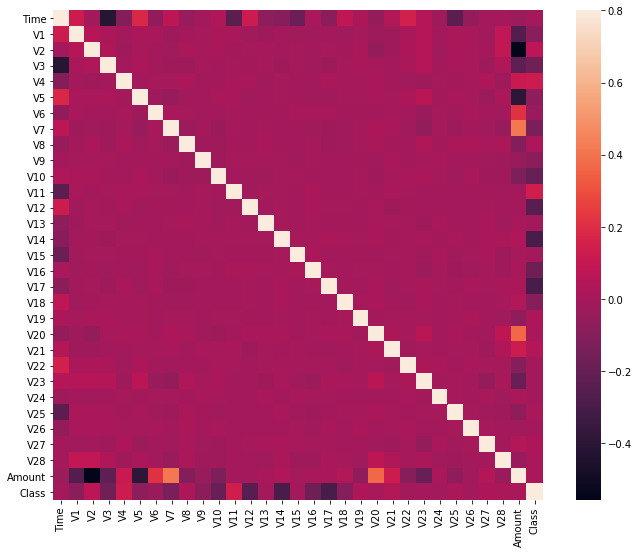

In [12]:
corr_matrix=sample_data.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(corr_matrix,vmax=0.8,square=True)
plt.show()

In [13]:
columns=sample_data.columns.to_list()

columns=[c for c in columns if c not in ['Class']]

In [14]:
target='Class'

X=sample_data[columns]
Y=sample_data[target]

In [15]:
print("Shape of Features: ",X.shape)
print("Shape of labels: ",Y.shape)

Shape of Features:  (28481, 30)
Shape of labels:  (28481,)


In [16]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor 

In [17]:
#define a random state

state=1

#define the outlier detection methods

classifiers={"Isolation Forest":IsolationForest(max_samples=len(X),contamination=outlier_fraction,random_state=state),
"Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)}

In [22]:
# fit the model

n_outliers=len(fraud)


for i,(clf_name,clf) in enumerate(classifiers.items()):
    
    if clf_name=="Isolation Forest":
        clf.fit(X)
        scores_pred=clf.decision_function(X)
        y_pred=clf.predict(X)
    else:
        y_pred=clf.fit_predict(X)
        scores_pred=clf.negative_outlier_factor_
#Reshape the predicted values i.e 0 for real and 1 for fraud
    y_pred[y_pred == 1]=0
    y_pred[y_pred == -1]=1

    n_errors=(y_pred!=Y).sum()

#Run the classification metrics

    print("{}: {}".format(clf_name,n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))


Isolation Forest: 71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

